## 1. 데이터 불러오기

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '~/data/data/bike-sharing-demand/train.csv'

train = pd.read_csv(file_path)

train['datetime'] = pd.to_datetime(train['datetime'])

### 1-1. datetime 자료형으로 변환

In [4]:
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# 변환된 데이터프레임 출력 (초기 5행)
print("DataFrame with new datetime columns:")
print(train.head())


DataFrame with new datetime columns:
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0

## 2. 시각화 하기
- year, month, day, hour, minute, second 데이터 개수 시각화 하기

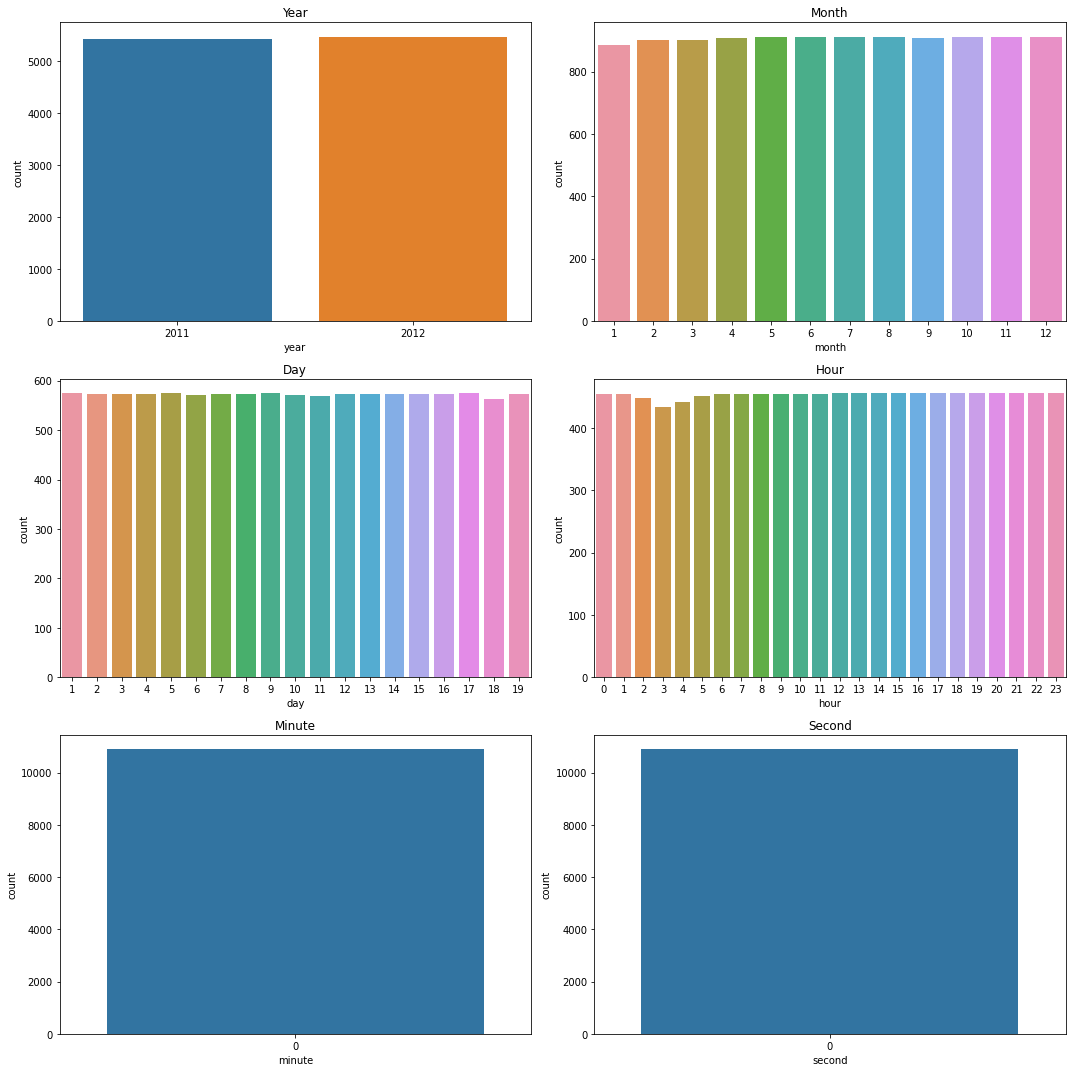

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 컬럼의 데이터 개수 시각화
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 연도별 데이터 개수 시각화
sns.countplot(data=train, x='year', ax=axes[0, 0])
axes[0, 0].set_title('Year')

# 월별 데이터 개수 시각화
sns.countplot(data=train, x='month', ax=axes[0, 1])
axes[0, 1].set_title('Month')

# 일별 데이터 개수 시각화
sns.countplot(data=train, x='day', ax=axes[1, 0])
axes[1, 0].set_title('Day')

# 시간별 데이터 개수 시각화
sns.countplot(data=train, x='hour', ax=axes[1, 1])
axes[1, 1].set_title('Hour')

# 분별 데이터 개수 시각화
sns.countplot(data=train, x='minute', ax=axes[2, 0])
axes[2, 0].set_title('Minute')

# 초별 데이터 개수 시각화
sns.countplot(data=train, x='second', ax=axes[2, 1])
axes[2, 1].set_title('Second')

plt.tight_layout()
plt.show()

### 2-1. 시각화 insight
- Temperature vs Count
    - 온도가 낮을수록 대여 수가 상대적으로 낮은 경향을 보입니다. 
    - 반대로, 온도가 높아질수록 대여 수가 증가합니다. 
    - 일부 온도 구간에서는 예측 값과 실제 값 사이에 차이가 존재하는 것을 확인할 수 있습니다.
    
- Humity vs Count
    - 습도가 낮을 때와 높을 때 모두 대여 수가 줄어듭니다.
    - 중간 정도의 습도에서는 대여 수가 높은 패턴이 관찰됩니다.
    - 예측 값은 실제 값과 비교적 일치합니다.

## 3. X, y 컬럼 선택 및 train/test 데이터 분리

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [16]:
# 예측할 y 변수 설정
y = train['count']

# 예측에 사용하지 않을 컬럼들 제외하고 X 변수 설정
features = ['year', 'month', 'day', 'hour', 'minute', 'second', 'temp', 'atemp', 'humidity', 'windspeed', 'season', 'holiday', 'workingday', 'weather']
X = train[features]

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. LinearRegression 모델 학습

In [22]:
# LinearRegression 모델 불러오기 및 학습하기
model = LinearRegression()
model.fit(X_train, y_train)

# 예측값 계산
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 5. 손실함수 계산 

In [25]:
# MSE 손실 함수 계산
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
# RMSE 손실 함수 계산
rmse_test = np.sqrt(mse_test)

print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")

Test MSE: 19945.37005375393
Test RMSE: 141.22807813517088


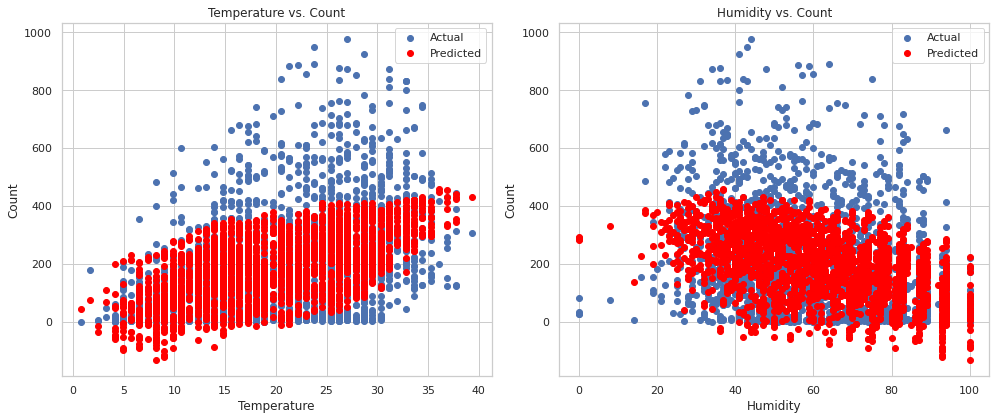

In [28]:
import seaborn as sns

# temp와 count 시각화
plt.figure(figsize=(14, 6))

# Temp vs Count
plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test, label="Actual")
plt.scatter(X_test['temp'], y_test_pred, color='red', label="Predicted")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Temperature vs. Count")
plt.legend()

# Humidity vs Count
plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test, label="Actual")
plt.scatter(X_test['humidity'], y_test_pred, color='red', label="Predicted")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.title("Humidity vs. Count")
plt.legend()

plt.tight_layout()
plt.show()